In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import scipy.interpolate as scint
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.interpolate import BSpline



In [2]:
fun = lambda x: np.sin(x)*x*x  +np.cos(x*5)
# Nice undersampling problem:
#fun = lambda x: np.sin(5*x)*x*x  +np.cos(x*5)
# # on np.linspace(0,10,11)
#fun = lambda x: np.sin(x)*np.cos(2*x)
low = 0
high = 12
x = np.array([0,1, 2, 3,4, 5, 6,7,8, 9, 10])
y = fun(x)
full_data = np.linspace(low, high, 1000)


In [3]:
inte_l = scint.interp1d(x,y, fill_value="extrapolate")
inte_c = scint.UnivariateSpline(x,y)

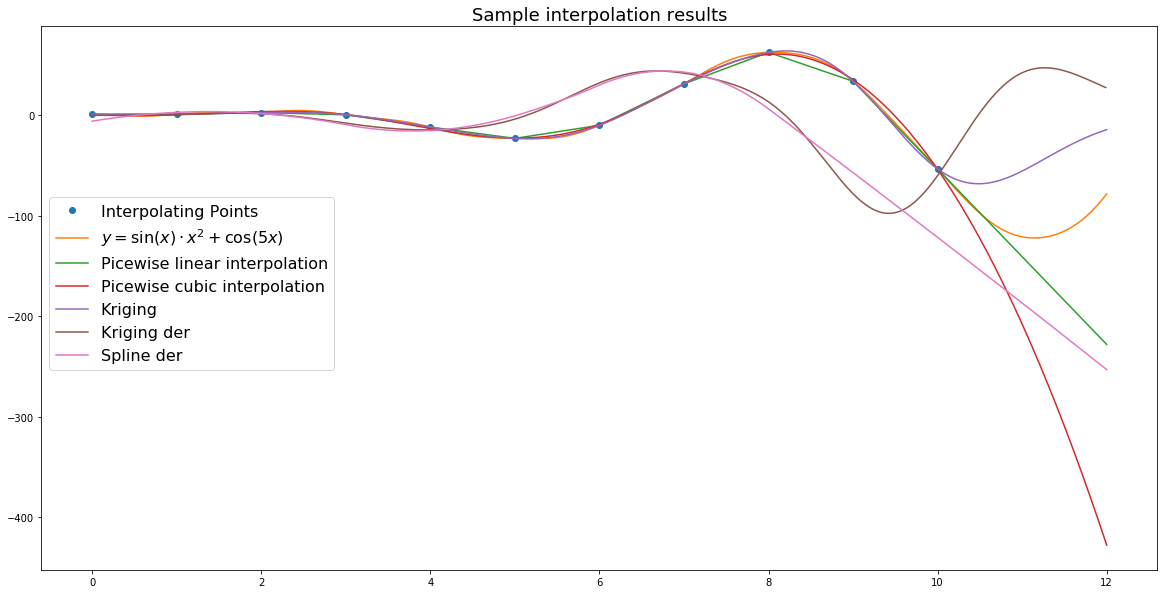

In [4]:
fig = plt.figure(figsize = (20,10))
plt.plot(x,y, "o")
plt.plot(full_data, fun(full_data))
plt.plot(full_data, inte_l(full_data))
plt.plot(full_data, inte_c(full_data))

gp = GaussianProcessRegressor()
gp.fit(X=x.reshape(-1,1), y=y)

pred = lambda x: gp.predict(x.reshape(-1,1))

plt.plot(full_data, pred(full_data))
plt.plot(full_data[:-1], np.diff(pred(full_data))/np.diff(full_data))
plt.plot(full_data, inte_c.derivative()(full_data))
plt.legend(["Interpolating Points", "$y = \sin(x)\cdot x^2 + \cos(5x)$", "Picewise linear interpolation", 
            "Picewise cubic interpolation", "Kriging", "Kriging der", "Spline der"],
           loc='upper left', bbox_to_anchor=(0, 0.7), fontsize=16)
plt.title("Sample interpolation results", fontsize=18);
#plt.savefig("sample_extrapolation.png",bbox_inches='tight')

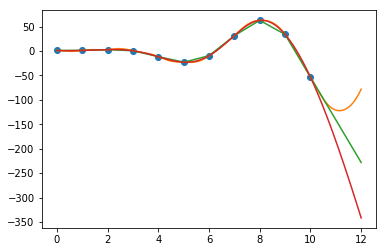

In [461]:
plt.plot(x,y, "o")
plt.plot(full_data, fun(full_data))
plt.plot(full_data, inte_l(full_data))
plt.plot(full_data, inte_c(full_data))

In [10]:
xx = np.array([0, 1, 2, 3, 5, 6,8, 9, 10])
yy = fun(xx)
yy[-3] = inte_c(7.5)
inte_c_2 = scint.interp1d(xx,yy, fill_value="extrapolate", kind="cubic")


In [25]:
a = np.array([[1,2,3,4]])
ma.masked_array(a, [0,1,0,1])

masked_array(data=[[1, --, 3, --]],
             mask=[[False,  True, False,  True]],
       fill_value=999999)

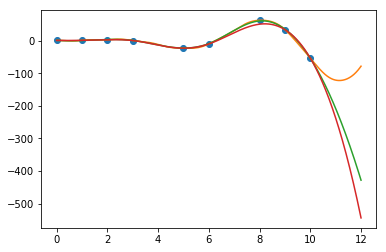

In [11]:
plt.plot(xx,fun(xx), "o")
plt.plot(full_data, fun(full_data))
plt.plot(full_data, inte_c(full_data))
plt.plot(full_data, inte_c_2(full_data))

In [15]:
import numpy.ma as ma
xx = np.array([0, 1, 2, 3,4, 5, 6,7,8, 9, 10])
mask = [j%2 for j in xx]
xx_ma = ma.masked_array(xx, mask)
yy = fun(xx_ma)
yy[-3] = inte_c(7.5)
inte_c_2 = scint.interp1d(xx_ma,yy, fill_value="extrapolate", kind="cubic")


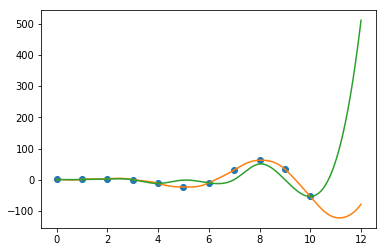

In [19]:
plt.plot(xx,fun(xx), "o")
plt.plot(full_data, fun(full_data))
#plt.plot(full_data, inte_c(full_data))
plt.plot(full_data, inte_c_2(full_data))

In [24]:
a = np.array([[1,2], [3,4]])
ma.masked_array(a, [[0.0,1], [0,1]])

masked_array(
  data=[[1, --],
        [3, --]],
  mask=[[False,  True],
        [False,  True]],
  fill_value=999999)

In [380]:
def error(f):
    test = full_data
    r2 = sum((fun(full_data) - f(full_data))**2)/len(test)
    return np.max(np.abs(fun(full_data) - f(full_data))), r2

In [381]:
error(inte_c),error(pred),error(inte_l)

((141.27192007234473, 1805.0913904390075),
 (147.0750489041962, 1771.5765754702438),
 (130.13868927010296, 1466.2410414519559))

In [427]:
from pykrige import OrdinaryKriging
X_pred = full_data
uk = OrdinaryKriging(x, np.zeros(x.shape), y, variogram_model='gaussian',)
y_pred, y_std = uk.execute('grid', X_pred, np.array([0.]))

y_pred = np.squeeze(y_pred)
y_std = np.squeeze(y_std)

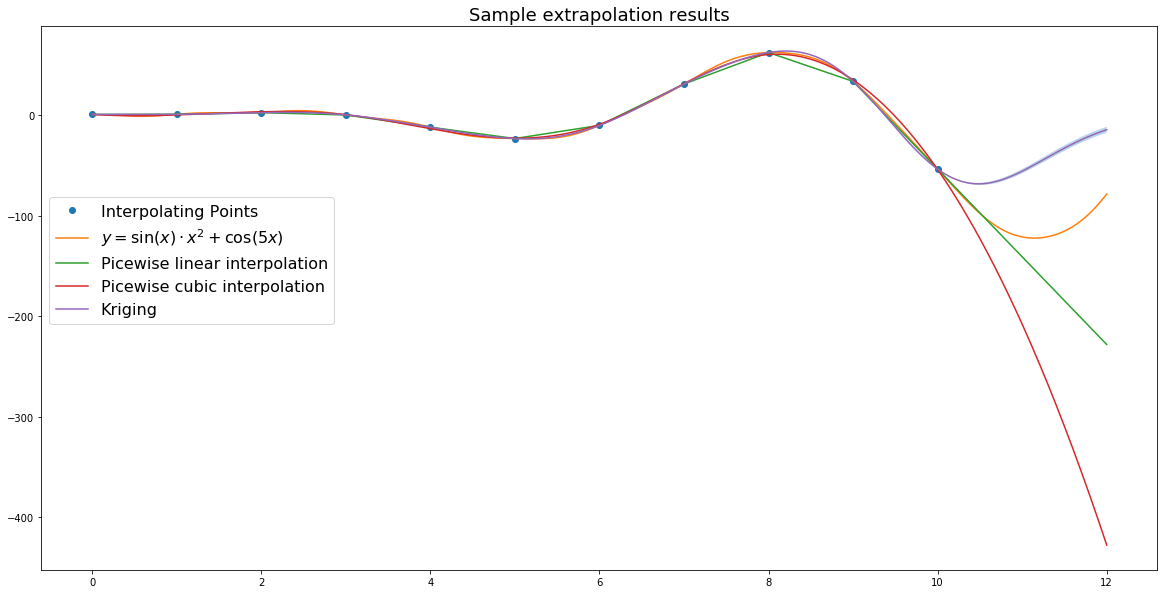

In [56]:
fig = plt.figure(figsize = (20,10))
plt.plot(x,y, "o")
plt.plot(full_data, fun(full_data))
plt.plot(full_data, inte_l(full_data))
plt.plot(full_data, inte_c(full_data))

gp = GaussianProcessRegressor()
gp.fit(X=x.reshape(-1,1), y=y)

pred = lambda x, out=False: gp.predict(x.reshape(-1,1), out)
out_std = np.zeros(full_data.shape)
y_pred_gauss, y_std = pred(full_data, True)
plt.plot(full_data, y_pred_gauss)
#plt.plot(full_data, y_pred)
plt.fill_between(full_data, y_pred_gauss-3*y_std, y_pred_gauss + 3*y_std, alpha=0.3)
plt.legend(["Interpolating Points", "$y = \sin(x)\cdot x^2 + \cos(5x)$", "Picewise linear interpolation", 
            "Picewise cubic interpolation", "Kriging"],loc='upper left', bbox_to_anchor=(0, 0.7), fontsize=16)
plt.title("Sample extrapolation results", fontsize=18);
plt.savefig("sample_extrapolation_line_cubic_krig.png", bbox_inches="tight")

In [439]:
yT

array([ 1.06,  0.92,  0.35,  0.49,  0.52,  0.12,  0.47, -0.19,  0.08,
       -0.19, -0.03, -0.03, -0.05,  0.1 ,  0.44,  0.66, -0.12,  0.45,
        0.14, -0.28, -0.46, -0.32, -1.58, -1.44, -1.51, -1.5 , -2.04,
       -1.57, -1.25, -1.5 , -1.42, -1.1 , -0.58, -1.08, -0.79, -1.  ,
       -0.04, -0.54, -0.15, -0.18, -0.25, -1.2 , -0.49, -0.83, -0.15,
        0.  , -1.1 , -0.32, -0.6 , -0.49, -0.5 , -0.02, -0.47, -0.11,
       -0.28,  0.4 ,  0.11,  0.32,  0.42,  0.57,  0.82,  1.18,  0.86,
        1.11,  0.74,  0.75,  1.15,  0.76,  0.68,  0.03,  0.31, -0.14,
       -0.88, -1.25, -1.62, -1.37, -0.99, -1.92, -1.94, -1.32, -1.69,
       -1.84, -2.05, -1.69, -0.53, -0.55, -0.92, -0.76, -0.41,  0.12,
        0.25,  0.16,  0.26,  0.62,  1.69,  1.11,  0.36,  0.79,  0.87,
        1.01,  0.55])

In [433]:
gp

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [436]:
ker = gp.kernel_

In [437]:
ker.bounds

array([], dtype=float64)

In [465]:
spl = scint.UnivariateSpline(x, y)


In [18]:
plt.plot(full_data,  spl.derivative(0)(full_data))
plt.plot(full_data, spl.antiderivative(1)(full_data))
plt.plot(full_data, spl.antiderivative(2)(full_data))
plt.plot(full_data, spl.antiderivative(3)(full_data))
plt.plot(full_data, spl.antiderivative(10)(full_data))
plt.plot(full_data,  spl.derivative(1)(full_data))
plt.plot(full_data,  spl.derivative(2)(full_data))
plt.plot(full_data,  spl.derivative(3)(full_data))

NameError: name 'spl' is not defined

In [7]:
fun = lambda x: np.sin(x)*x*x  +np.cos(x*5)
df = lambda x: np.cos(x)*x*x + 2*x*np.sin(x) - 5*np.sin(5*x)
ddf = lambda x: -(x*x - 2)*np.sin(x) + 4*x*np.cos(x) - 25*np.cos(5*x)
# Nice undersampling problem:
#fun = lambda x: np.sin(5*x)*x*x  +np.cos(x*5)
# # on np.linspace(0,10,11)
#fun = lambda x: np.sin(x)*np.cos(2*x)
low = 0
high = 12
x = np.array([0,1, 2, 3,4, 5, 6,7,8, 9, 10])
y = fun(x)
full_data = np.linspace(low, high, 1000)

In [53]:
spl = scint.UnivariateSpline(x, y)
gp = GaussianProcessRegressor()
gp.fit(X=x.reshape(-1,1), y=y)

pred = lambda x: gp.predict(x.reshape(-1,1))

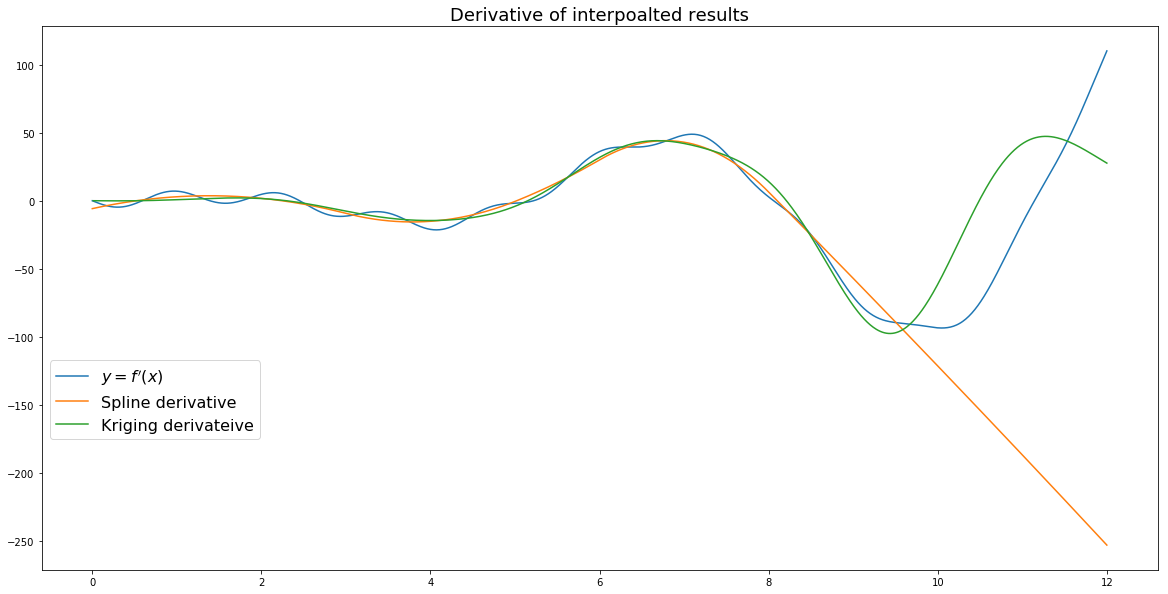

In [54]:
plt.figure(figsize=(20,10))
plt.plot(full_data, df(full_data))
plt.plot(full_data, spl.derivative()(full_data))
plt.plot(full_data[1:], np.diff(pred(full_data))/np.diff(full_data))
#plt.plot(full_data, ddf(full_data))
#plt.plot(full_data, spl.derivative(2)(full_data))
#plt.plot(full_data[2:], np.diff(np.diff(pred(full_data))/np.diff(full_data))/np.diff(full_data[1:]))
plt.legend(["$y = f'(x)$", "Spline derivative", "Kriging derivateive", "$f''$","spline second", "kriging second"],
          loc='upper left', bbox_to_anchor=(0, 0.4), fontsize=16)
plt.title("Derivative of interpoalted results", fontsize=18);
plt.plot()
plt.savefig("derivative_interpolation.png", bbox_inches="tight")

In [51]:
def curvature(f):
    first_derivative = f.derivative()
    second_derivative = first_derivative.derivative()
    def a(X_param):
        return first_derivative(X_param)/((1+second_derivative(X_param)**2)**1.5)
    return a

def curv_orig(X_param):
    return ddf(X_param)/((1+df(X_param)**2)**1.5)

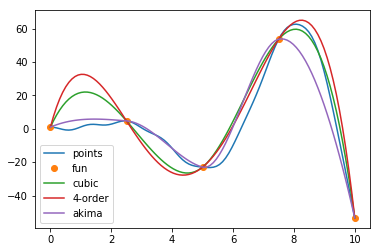

In [5]:
XX = np.linspace(0,10, 100)
xxx = np.linspace(0,10, 5)
yyy = fun(xxx)
plt.plot(XX, fun(XX))
plt.plot(xxx, yyy, "o")
sp1 = scint.UnivariateSpline(xxx, yyy, s=0)
sp2 = scint.UnivariateSpline(xxx, yyy, k=4, s=0)
der = sp1.derivative()
akima = scint.Akima1DInterpolator(xxx, yyy)
der2 = der.derivative()
der_1 = sp2.derivative()
der_2 = der_1.derivative()
dera = akima.derivative()
dera2 = dera.derivative()
plt.plot(XX, sp1(XX))
plt.plot(XX, sp2(XX))
plt.plot(XX, akima(XX))
plt.legend(["points", "fun", "cubic", "4-order", "akima"])

In [ ]:
plt.legend(["fun", "cubic", "4-order", "akima"])
plt.plot(XX,curv_orig(XX))
plt.plot(XX, curvature(sp1)(XX))
plt.plot(XX, curvature(sp2)(XX))
plt.plot(XX, curvature(akima)(XX))
plt.legend(["fun", "cubic", "4-order", "akima"])

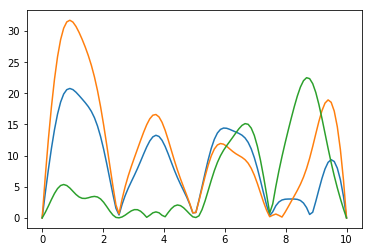

In [44]:
plt.plot(XX, abs(sp1(XX) - fun(XX)))
plt.plot(XX, abs(sp2(XX) - fun(XX)))
plt.plot(XX, abs(akima(XX) - fun(XX)))

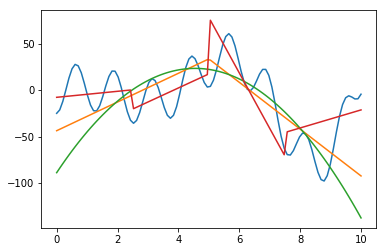

In [46]:
plt.plot(XX, ddf(XX))
plt.plot(XX, der2(XX))
plt.plot(XX, der_2(XX))
plt.plot(XX, dera2(XX))